In [1]:
VERSION

v"1.8.0-DEV.19"

In [2]:
using Plots
default(size=(400, 250))

using Random
Random.seed!(4649373)

TaskLocalRNG()

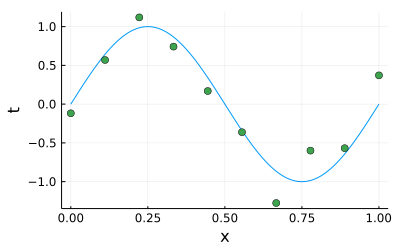

In [3]:
x = range(0, 1; length=10)

f(x) = sinpi(2x)
noise = 0.2randn(length(x))
t = f.(x) + noise

xs = range(extrema(x)...; length=1000)
plot(xs, f.(xs); label="", xlabel="x", ylabel="t")
scatter!(x, t; label="", color=3)

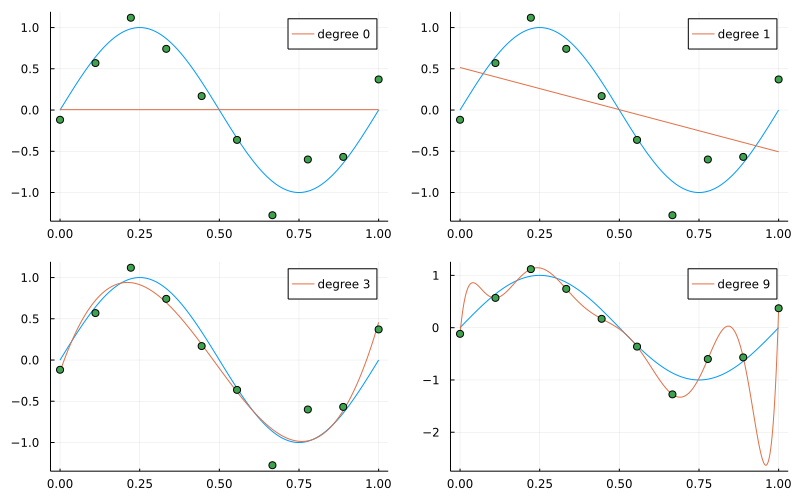

In [4]:
PP = []
for d in (0, 1, 3, 9)
    X = x.^(0:d)'
    w = X\t
    g(x) = evalpoly(x, w)
    P = plot(xs, f.(xs); label="")
    plot!(xs, g.(xs); label="degree $d")
    scatter!(x, t; label="")
    push!(PP, P)
end
plot(PP...; size=(800, 500))

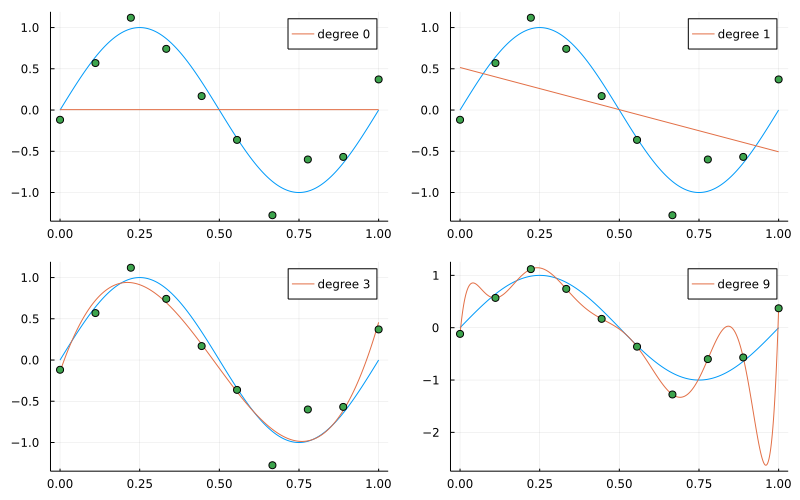

In [5]:
PP = []
for d in (0, 1, 3, 9)
    X = x.^(0:d)'
    w = X'X\X't
    g(x) = evalpoly(x, w)
    P = plot(xs, f.(xs); label="")
    plot!(xs, g.(xs); label="degree $d")
    scatter!(x, t; label="")
    push!(PP, P)
end
plot(PP...; size=(800, 500))

In [6]:
using SymPy
n = 5
x = collect(symbols("x1:$(n+1)", real=true))

5-element Vector{Sym}:
 x1
 x2
 x3
 x4
 x5

In [7]:
t = collect(symbols("t1:$(n+1)", real=true))

5-element Vector{Sym}:
 t1
 t2
 t3
 t4
 t5

In [8]:
d = 3
X = x.^(0:d)'

5×4 Matrix{Sym}:
 1  x1  x1^2  x1^3
 1  x2  x2^2  x2^3
 1  x3  x3^2  x3^3
 1  x4  x4^2  x4^3
 1  x5  x5^2  x5^3

In [9]:
A = X'X

4×4 Matrix{Sym}:
                                5  …  x1^3 + x2^3 + x3^3 + x4^3 + x5^3
           x1 + x2 + x3 + x4 + x5     x1^4 + x2^4 + x3^4 + x4^4 + x5^4
 x1^2 + x2^2 + x3^2 + x4^2 + x5^2     x1^5 + x2^5 + x3^5 + x4^5 + x5^5
 x1^3 + x2^3 + x3^3 + x4^3 + x5^3     x1^6 + x2^6 + x3^6 + x4^6 + x5^6

In [10]:
T = X't

4-element Vector{Sym}:
                          t1 + t2 + t3 + t4 + t5
           t1*x1 + t2*x2 + t3*x3 + t4*x4 + t5*x5
 t1*x1^2 + t2*x2^2 + t3*x3^2 + t4*x4^2 + t5*x5^2
 t1*x1^3 + t2*x2^3 + t3*x3^3 + t4*x4^3 + t5*x5^3